<a href="https://colab.research.google.com/github/Bharghavis/Voice-classification-using-ML/blob/main/Neural_Network_Voice_emotion_recognition_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/Colab Notebooks/archive (1)/Actor_05/03-01-01-01-01-01-05.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


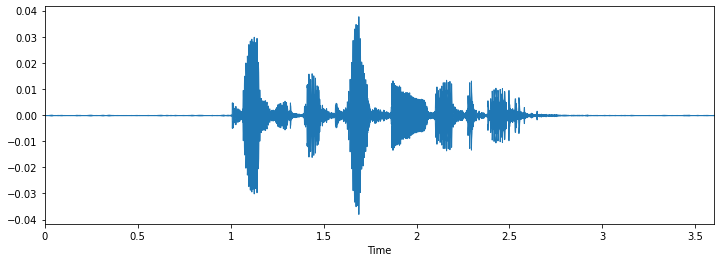

In [ ]:
%pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
import time
import os
path = '/content/drive/MyDrive/Colab Notebooks/archive (1)'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1664.9697258472443 seconds ---


In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((2880, 40), (2880,))

In [ ]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/MyDrive/Colab Notebooks/RAVDESS_MODEL'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
# Loading saved models
import joblib
X = joblib.load('/content/drive/MyDrive/Colab Notebooks/RAVDESS_MODEL/X.joblib')
y = joblib.load('/content/drive/MyDrive/Colab Notebooks/RAVDESS_MODEL/y.joblib')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        57
           1       0.84      0.86      0.85       126
           2       0.86      0.71      0.78       133
           3       0.82      0.79      0.81       126
           4       0.89      0.86      0.88       132
           5       0.81      0.85      0.83       130
           6       0.75      0.80      0.77       118
           7       0.73      0.78      0.75       129

    accuracy                           0.80       951
   macro avg       0.80      0.80      0.79       951
weighted avg       0.81      0.80      0.80       951



In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((1929, 40, 1), (951, 40, 1))

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
import tensorflow
from tensorflow.keras import optimizers
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0003,decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 40, 64)            384       
                                                                 
 activation_32 (Activation)  (None, 40, 64)            0         
                                                                 
 dropout_24 (Dropout)        (None, 40, 64)            0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 10, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 10, 128)           41088     
                                                                 
 activation_33 (Activation)  (None, 10, 128)           0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
121/121 [==============================] - 7s 45ms/step - loss: 4.4808 - accuracy: 0.1446 - val_loss: 2.2579 - val_accuracy: 0.1682
Epoch 2/200
121/121 [==============================] - 4s 33ms/step - loss: 2.3077 - accuracy: 0.1923 - val_loss: 1.9394 - val_accuracy: 0.2713
Epoch 3/200
121/121 [==============================] - 4s 36ms/step - loss: 2.0373 - accuracy: 0.2312 - val_loss: 1.9271 - val_accuracy: 0.3176
Epoch 4/200
121/121 [==============================] - 3s 26ms/step - loss: 1.9276 - accuracy: 0.2509 - val_loss: 1.8157 - val_accuracy: 0.3081
Epoch 5/200
121/121 [==============================] - 2s 16ms/step - loss: 1.8733 - accuracy: 0.2784 - val_loss: 1.7843 - val_accuracy: 0.2997
Epoch 6/200
121/121 [==============================] - 2s 18ms/step - loss: 1.7952 - accuracy: 0.3188 - val_loss: 1.7157 - val_accuracy: 0.3165
Epoch 7/200
121/121 [==============================] - 2s 17ms/step - loss: 1.7362 - accuracy: 0.3344 - val_loss: 1.6566 - val_accuracy:

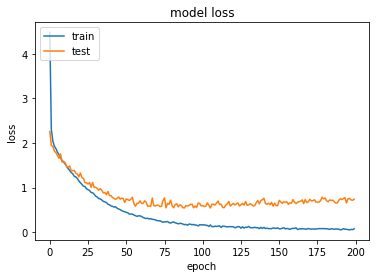

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

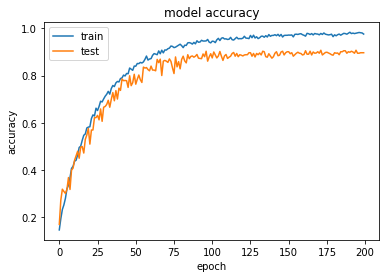

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_testcnn),axis=1)

In [ ]:
predictions

array([5, 1, 5, 3, 2, 6, 2, 4, 7, 1, 3, 1, 0, 1, 6, 1, 4, 7, 4, 7, 7, 1,
       1, 3, 5, 4, 3, 3, 2, 6, 6, 3, 3, 6, 1, 4, 1, 1, 7, 1, 5, 1, 2, 3,
       4, 6, 1, 6, 2, 2, 5, 4, 2, 2, 3, 2, 5, 1, 1, 6, 7, 7, 5, 5, 2, 7,
       1, 1, 6, 2, 3, 2, 4, 5, 4, 1, 5, 3, 0, 3, 3, 4, 2, 1, 7, 6, 6, 4,
       5, 4, 5, 3, 5, 5, 0, 5, 3, 2, 1, 4, 4, 3, 5, 6, 1, 5, 4, 4, 4, 1,
       1, 5, 3, 5, 7, 6, 7, 7, 4, 7, 5, 3, 6, 1, 4, 5, 3, 1, 2, 2, 0, 7,
       3, 2, 7, 3, 2, 5, 5, 7, 7, 6, 2, 1, 5, 1, 5, 7, 6, 5, 0, 3, 0, 4,
       7, 5, 1, 7, 5, 1, 4, 1, 3, 2, 2, 4, 4, 6, 0, 6, 6, 6, 4, 4, 2, 2,
       6, 7, 7, 3, 7, 3, 3, 4, 5, 4, 5, 3, 6, 7, 2, 2, 6, 7, 1, 7, 2, 2,
       7, 3, 3, 2, 6, 6, 7, 2, 2, 7, 0, 3, 3, 3, 5, 5, 3, 5, 7, 7, 7, 2,
       5, 5, 1, 7, 6, 4, 4, 3, 1, 1, 1, 5, 2, 0, 4, 1, 5, 6, 1, 4, 7, 5,
       4, 5, 7, 2, 2, 6, 2, 6, 5, 5, 5, 0, 5, 2, 7, 0, 6, 4, 4, 1, 0, 1,
       3, 3, 2, 6, 3, 6, 1, 1, 3, 2, 1, 7, 6, 7, 5, 1, 3, 2, 1, 2, 5, 4,
       4, 5, 7, 7, 3, 3, 4, 7, 7, 4, 6, 0, 3, 5, 2,

In [ ]:
y_test

array([5, 1, 5, 3, 2, 6, 7, 4, 7, 1, 3, 1, 0, 1, 6, 1, 4, 7, 4, 7, 7, 1,
       1, 3, 5, 4, 3, 3, 2, 6, 6, 0, 3, 6, 1, 4, 1, 1, 7, 1, 5, 4, 2, 3,
       4, 6, 1, 6, 7, 2, 5, 4, 2, 2, 3, 2, 3, 1, 1, 6, 7, 7, 5, 5, 2, 7,
       1, 1, 6, 2, 3, 2, 4, 5, 4, 1, 5, 3, 1, 3, 3, 4, 2, 1, 7, 6, 6, 4,
       1, 4, 5, 3, 5, 3, 0, 5, 3, 2, 1, 4, 4, 3, 5, 6, 0, 5, 4, 4, 4, 1,
       1, 5, 3, 5, 7, 6, 7, 7, 4, 7, 5, 3, 6, 1, 4, 5, 3, 1, 2, 2, 0, 7,
       3, 2, 7, 3, 2, 5, 5, 7, 7, 6, 2, 1, 5, 4, 5, 4, 7, 5, 0, 3, 0, 4,
       7, 1, 1, 4, 5, 1, 4, 1, 3, 2, 2, 4, 4, 6, 0, 6, 6, 6, 4, 4, 2, 2,
       6, 7, 7, 3, 7, 3, 3, 6, 5, 4, 5, 3, 6, 7, 7, 2, 6, 7, 1, 7, 2, 2,
       7, 3, 5, 2, 6, 6, 4, 2, 2, 7, 0, 3, 3, 3, 5, 5, 3, 5, 7, 6, 7, 2,
       5, 5, 1, 2, 6, 4, 4, 3, 1, 1, 1, 5, 2, 0, 4, 1, 5, 6, 1, 4, 4, 5,
       4, 5, 7, 2, 2, 6, 2, 6, 5, 5, 2, 0, 5, 2, 7, 0, 6, 4, 4, 2, 0, 1,
       0, 3, 2, 6, 3, 6, 1, 1, 3, 2, 1, 7, 6, 7, 3, 1, 3, 4, 1, 2, 5, 4,
       4, 5, 7, 7, 3, 3, 4, 7, 7, 4, 6, 0, 3, 5, 2,

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
new_Ytest

array([5, 1, 5, 3, 2, 6, 7, 4, 7, 1, 3, 1, 0, 1, 6, 1, 4, 7, 4, 7, 7, 1,
       1, 3, 5, 4, 3, 3, 2, 6, 6, 0, 3, 6, 1, 4, 1, 1, 7, 1, 5, 4, 2, 3,
       4, 6, 1, 6, 7, 2, 5, 4, 2, 2, 3, 2, 3, 1, 1, 6, 7, 7, 5, 5, 2, 7,
       1, 1, 6, 2, 3, 2, 4, 5, 4, 1, 5, 3, 1, 3, 3, 4, 2, 1, 7, 6, 6, 4,
       1, 4, 5, 3, 5, 3, 0, 5, 3, 2, 1, 4, 4, 3, 5, 6, 0, 5, 4, 4, 4, 1,
       1, 5, 3, 5, 7, 6, 7, 7, 4, 7, 5, 3, 6, 1, 4, 5, 3, 1, 2, 2, 0, 7,
       3, 2, 7, 3, 2, 5, 5, 7, 7, 6, 2, 1, 5, 4, 5, 4, 7, 5, 0, 3, 0, 4,
       7, 1, 1, 4, 5, 1, 4, 1, 3, 2, 2, 4, 4, 6, 0, 6, 6, 6, 4, 4, 2, 2,
       6, 7, 7, 3, 7, 3, 3, 6, 5, 4, 5, 3, 6, 7, 7, 2, 6, 7, 1, 7, 2, 2,
       7, 3, 5, 2, 6, 6, 4, 2, 2, 7, 0, 3, 3, 3, 5, 5, 3, 5, 7, 6, 7, 2,
       5, 5, 1, 2, 6, 4, 4, 3, 1, 1, 1, 5, 2, 0, 4, 1, 5, 6, 1, 4, 4, 5,
       4, 5, 7, 2, 2, 6, 2, 6, 5, 5, 2, 0, 5, 2, 7, 0, 6, 4, 4, 2, 0, 1,
       0, 3, 2, 6, 3, 6, 1, 1, 3, 2, 1, 7, 6, 7, 3, 1, 3, 4, 1, 2, 5, 4,
       4, 5, 7, 7, 3, 3, 4, 7, 7, 4, 6, 0, 3, 5, 2,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.88      0.94      0.91       126
           2       0.92      0.85      0.88       133
           3       0.89      0.87      0.88       126
           4       0.97      0.86      0.91       132
           5       0.87      0.92      0.90       130
           6       0.93      0.95      0.94       118
           7       0.85      0.91      0.88       129

    accuracy                           0.90       951
   macro avg       0.90      0.90      0.89       951
weighted avg       0.90      0.90      0.90       951



In [ ]:
model.save('testing_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('testing_model.h5')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 40, 64)            384       
                                                                 
 activation_32 (Activation)  (None, 40, 64)            0         
                                                                 
 dropout_24 (Dropout)        (None, 40, 64)            0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 10, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 10, 128)           41088     
                                                                 
 activation_33 (Activation)  (None, 10, 128)           0         
                                                      

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

30/30 [==============================] - 0s 4ms/step - loss: 0.7394 - accuracy: 0.8970
Restored model, accuracy: 89.70%


In [ ]:
model_name = 'cnnmodel.h5'
save_dir = '/content/drive/My Drive/Colab Notebooks'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/cnnmodel.h5 


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/cnnmodel.h5')
loaded_model.summary()
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 40, 64)            384       
                                                                 
 activation_32 (Activation)  (None, 40, 64)            0         
                                                                 
 dropout_24 (Dropout)        (None, 40, 64)            0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 10, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 10, 128)           41088     
                                                                 
 activation_33 (Activation)  (None, 10, 128)           0         
                                                      